<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/PYL800/blob/main/Codes/Assignment1/Assignment1_Final.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/PYL800/blob/main/Codes/Assignment1/Assignment1_Final.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
</table>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### Defining a Function to get the energy corresponding to a given K.

In [2]:
def give_energy(K, h=1, m=1):
    """
    This function calculates the energy of a particle in a potential
    field.
    """
    return (h**2*K**2)/(2*m)

give_energy = np.vectorize(give_energy)

## Solution

### Defining the Matrix

The final matrix, that we get is:
$$M = 
\begin{bmatrix}
\frac{\hbar^2K^2}{2m}-E & V_{\frac{-2\pi}{a}}& V_{\frac{2\pi}{a}} \\
V_{\frac{2\pi}{a}} & \frac{\hbar^2(K+\frac{2\pi}{a})^2}{2m}-E & V_{\frac{4\pi}{a}} \\
V_{\frac{-2\pi}{a}} & V_{\frac{-4\pi}{a}} & \frac{\hbar^2(K-\frac{2\pi}{a})^2}{2m}-E
\end{bmatrix}
$$
We need to diagonalize this, namely, we need to find E such that
$$ det(M) = 0 $$

In [3]:
#Setting the variables
E = Symbol('E')
Vp = Symbol('V', complex=True)
Vm = Vp.conjugate()
Vpp = Symbol('Vp', complex=True)
Vmm = Vpp.conjugate()
E0 = Symbol('E0')
Ep = Symbol('Ep')
Em = Symbol('Em')

In [4]:
#Creating the matrix
mat = Matrix([[E0-E, Vm, Vp], [Vm, Ep-E, Vpp], [Vp, Vmm, Em-E]])
mat

Matrix([
[     -E + E0,  conjugate(V),       V],
[conjugate(V),       -E + Ep,      Vp],
[           V, conjugate(Vp), -E + Em]])

Here for simplicity, I have used:
$$E_0 = \frac{\hbar^2K^2}{2a^2}$$
$$ E_p = \frac{\hbar^2(K+\frac{2\pi}{a})^2}{2a^2}$$
$$ E_m = \frac{\hbar^2(K-\frac{2\pi}{a})^2}{2a^2}$$
$$ V = V_{\frac{-2\pi}{a}}$$
$$ \bar{V} = V_{\frac{2\pi}{a}}$$
$$ V_p = V_{\frac{4\pi}{a}}$$
$$ \bar{V_p} = V_{\frac{-4\pi}{a}}$$

### Solving for E

If I solve the equation symbolically for E, I'll get a HUGE expression for E. To make the expression smaller, I'll set the values of $V$ and $V_P$ to be equal to 1.

In [5]:
#Getting the determinant
eq = mat.det()
#Substituting Vp = Vpp =1 to simplify the equation
eq = eq.subs(Vp, 1)
eq = eq.subs(Vpp, 1)
eq

-E**3 + E**2*E0 + E**2*Em + E**2*Ep - E*E0*Em - E*E0*Ep - E*Em*Ep + 3*E + E0*Em*Ep - E0 - Em - Ep + 2

Now, I need to solve for E in terms of $E_0$, $E_M$ and $E_P$.

In [6]:
Es = solve(eq, E)
len(Es)

3

Since the equation was third order, we should get three different solutions of E. As we can see from the output of the above cell, `len(Es)` is indeed 3. Let's see what these three solutions are:

**First Solution**

In [7]:
E1 = Es[0]
E1

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

**Second Solution**

In [8]:
E2 = Es[1]
E2

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-1/2 - sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

**Third Solution**

In [9]:
E3  = Es[2]
E3

E0/3 + Em/3 + Ep/3 - (-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)/(3*(-1/2 + sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*E0*Em*Ep/2 + 27*E0/2 + 27*Em/2 + 27*Ep/2 + sqrt(-4*(-3*E0*Em - 3*E0*Ep - 3*Em*Ep + (-E0 - Em - Ep)**2 + 9)**3 + (-27*E0*Em*Ep + 27*E0 + 27*Em + 27*Ep - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3) + 2*(-E0 - Em - Ep)**3 - 54)**2)/2 - (-9*E0 - 9*Em - 9*Ep)*(E0*Em + E0*Ep + Em*Ep - 3)/2 + (-E0 - Em - Ep)**3 - 27)**(1/3)/3

The solutions are still quite big and complex. The reason behind this is that `sympy` is not very good at simplifying expressions. 

### Plotting the Energy Curves

Final step is evaluating the energy of the system by substituting the values of $E_P$, $E_M$ and $E_0$ into the equation. We already have a function `give_energy` that returns the energy E, given k, m and a. By default, $m=a=1$. We'll use this defualt values. However, we can easily pass m and a as arguments to the function to change the default values.

In [10]:
def substitute(E, K, **kwargs):
    """
    Takes one value of E and returns numerical value of E after making all the substitutions and
    for a specific K value
    """
    #Substituing E0
    E_num = E.subs(E0, give_energy(K=K, **kwargs))
    #Substituing Ep which is nothing but E0 with K= K + G and as G = 2*pi, so K = K + 2*pi
    E_num = E_num.subs(Ep, give_energy(K=K+2*np.pi, **kwargs))
    #Substituing Em which is nothing but E0 with K= K - G and as G = 2*pi, so K = K - 2*pi
    E_num = E_num.subs(Em, give_energy(K=K-2*np.pi, **kwargs))
    E_num = E_num.evalf()
    #Sometimes, we are getting a complex number, with very small imaginary part(ususally < 1e-15)
    #because of the precision of the computer. So, we are removing the imaginary part.
    E_num = E_num.subs(I, 0)
    return E_num

#Finally, we'll make the function a vectorized function
substitute = np.vectorize(substitute)

Let's do a sanity check!

In [11]:
display(substitute(E1, 0.5))
display(substitute(E2, 0.5))
display(substitute(E3, 0.5))
display(substitute(E1, np.pi))
display(substitute(E2, np.pi))
display(substitute(E3, np.pi))

array(0.0265444478729320, dtype=object)

array(16.6090607554717, dtype=object)

array(23.2178124010128, dtype=object)

array(3.93480220054468, dtype=object)

array(5.88289503360872, dtype=object)

array(44.4651269718381, dtype=object)

So, it is working. Let's plot them.

In [12]:
#Defining K values
K = np.linspace(-2*np.pi, 2*np.pi, 100)

#Getting the values of energies
Ev1 = substitute(E1, K)
Ev2 = substitute(E2, K)
Ev3 = substitute(E3, K)

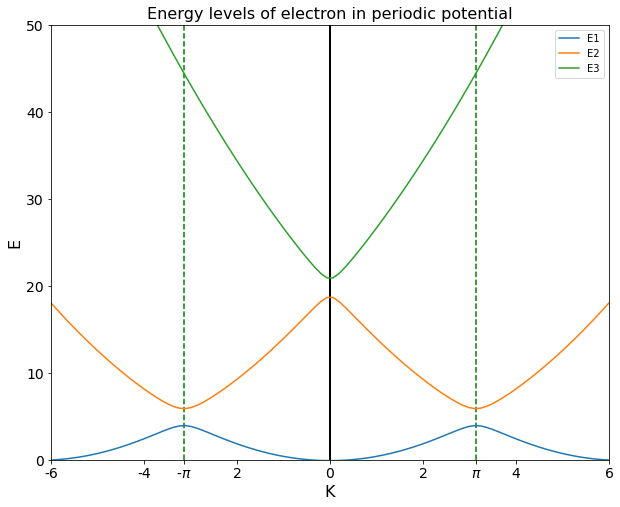

In [13]:
%matplotlib inline

#Setting Figure Size
plt.figure(figsize=(10,8))

#Plotting the three energies
plt.plot(K, Ev1, label='E1')
plt.plot(K, Ev2, label='E2')
plt.plot(K, Ev3, label='E3')

#Making three vertical lines, one for x=0, ie. y-axis
#and two for x=pi, and x= -pi

plt.vlines(0,0,85, color='black', linewidth=2)
plt.vlines(np.pi,0,85, color='green', linestyle='dashed')
plt.vlines(-np.pi,0,85, color='green', linestyle='dashed')

#Setting the x and y labels and title
plt.xlabel('K', fontsize=16)
plt.ylabel('E', fontsize=16)
plt.title('Energy levels of electron in periodic potential', fontsize=16)

#Setting the xlimit and ylimit
plt.xlim(-6,6)
plt.ylim(0,50)

#Modifying the xticks and making the ticks larger
plt.xticks([-6,-4, -np.pi,-2, 0, 2, np.pi, 4,6],
     ['-6','-4','-$\pi$','2','0', '2', '$\pi$' ,'4','6'],
     fontsize=14)
plt.yticks(fontsize=14)

#Placing the legends
plt.legend();

Making the plot a bit interactive. However, the output won't be visible in the pdf (The `jupyter nbconvert` is not able to export dynamic graphics to pdf). You'll need to download the notebook and run it locally. You'll also need to download `ipympl` library.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
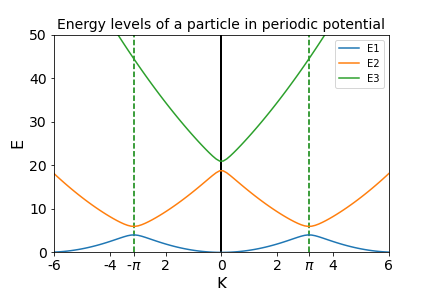

In [14]:
%matplotlib widget
#Making the plots
plt.plot(K, Ev1, label='E1')
plt.plot(K, Ev2, label='E2')
plt.plot(K, Ev3, label='E3')
plt.vlines(0,0,85, color='black', linewidth=2)
plt.vlines(np.pi,0,85, color='green', linestyle='dashed')
plt.vlines(-np.pi,0,85, color='green', linestyle='dashed')
plt.xlabel('K', fontsize=16)
plt.ylabel('E', fontsize=16)
plt.xlim(-6,6)
plt.xticks([-6,-4, -np.pi,-2, 0, 2, np.pi, 4,6],
     ['-6','-4','-$\pi$','2','0', '2', '$\pi$' ,'4','6'],
     fontsize=14)
plt.title('Energy levels of a particle in periodic potential', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,50)
plt.legend();